# Continuous Control

---
Udacity Deep Reinforcement Learning Nanodegree

Capstone 2 :  Continuous Control with Unity ML-Agents Reacher Environment

---
Swastik Nath.

IMPLEMENTATION IN COURTESY OF UDACITY.

---


### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


### Specifics about the Environment:
The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below. At the first, we select the single agent version, and then we will look into the multi-agent version.

---
#### A. Selecting the Single Agent:


In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.07999999821186066


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [30]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    in_size = layer.weight.data.size()[0]
    lim = 1./np.sqrt(in_size)
    return (-lim, lim)

class Actor(nn.Module):
    
    def __init__(self, state_size, action_size, seed=0, fc1_size=128, fc2_size=128):
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.state_size=state_size
        self.action_size=action_size
        self.fc1 = nn.Linear(state_size, fc1_size)
        self.fc2 = nn.Linear(fc1_size, fc2_size)
        self.fc3 = nn.Linear(fc2_size, action_size)
        self.bn1 = nn.BatchNorm1d(fc1_size)
        self.bn2 = nn.BatchNorm1d(fc2_size)
        self.reset_params()
        
    def reset_params(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)
        
    def forward(self, state):
        if len(state) == self.state_size:
            state = torch.unsqueeze(state, 0)
        x = F.relu(self.fc1(state))
        x = self.bn1(x)
        x = F.relu(self.fc2(x))
        return F.tanh(self.fc3(x))
    
class Critic(nn.Module):
    
    def __init__(self, state_size, action_size, seed=0, fc1_size=128, fc2_size=128):
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.state_size=state_size
        self.action_size=action_size
        self.fc1 = nn.Linear(state_size, fc1_size)
        self.fc2 = nn.Linear(fc1_size+action_size, fc2_size)
        self.fc3 = nn.Linear(fc2_size, 1)
        self.bn1 = nn.BatchNorm1d(fc1_size)
        self.bn2 = nn.BatchNorm1d(fc2_size)
        self.reset_params()
        
    def reset_params(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)
    
    def forward(self, state, action):
        x1 = F.relu(self.fc1(state))
        x1 = self.bn1(x1)
        x = torch.cat((x1, action), dim=1)
        x = F.relu(self.fc2(x))
        return self.fc3(x)

Writing model.py


In [16]:
actor_network = Actor(7, 4)
print(actor_network)

Actor(
  (fc1): Linear(in_features=7, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [1]:
%%writefile agent.py
from collections import deque, namedtuple
import numpy as np
import random
import copy
class ExperienceReplayBuffer():
    '''
    EXPERIENCE REPLAY BUFFER.
    '''
    def __init__(self, action_size, buffer_size, batch_size, seed=0):
        self.action_size = action_size
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.seed = random.seed(seed)
        self.experience = namedtuple("Experience", field_names=['state', 'action', 'reward', 'next_state', 'done'])
        self.memory = deque(maxlen=buffer_size)
        
    def add(self, state, action, reward, next_state, done):
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def __len__(self):
        return len(self.memory)
    
    def sample(self):
        experiences = random.sample(self.memory, k=self.batch_size)
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        return (states, actions, rewards, next_states, dones)
    
class OUNoiseProcess:
    
    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.1, parallal=False):
        self.mu = mu*np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.size = size
        self.seed = random.seed(seed)
        self.parallal=parallal
        self.reset()
        
        
    def reset(self):
        self.state = copy.copy(self.mu)
        
    def sample(self):
        x = self.state
        if self.parallal:
            dx = self.theta * (self.mu - x) + self.sigma * np.random.normal(0, 1, self.size)
        else:
            dx = self.theta * (self.mu  - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

Writing agent.py


In [2]:
%%writefile -a agent.py
import numpy as np
import random 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

BUFFER_SIZE = int(1e5)
BATCH_SIZE = 128
GAMMA = 0.99
TAU = 1e-3
LR_ACTOR = 2e-4
LR_CRITIC = 2e-4
WEIGHT_DECAY = 0

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

class Agent():
    
    def __init__(self, state_size, action_size, random_seed=0, parallal=False, num_agents=0):
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        self.parallal=parallal
        self.num_agents=num_agents
        self.actor_online = Actor(state_size, action_size).to(device)
        self.actor_target = Actor(state_size, action_size).to(device)
        self.actor_optimizer = optim.Adam(self.actor_online.parameters(), lr=LR_ACTOR, weight_decay=WEIGHT_DECAY)
        
        self.critic_online = Critic(state_size, action_size).to(device)
        self.critic_target = Critic(state_size, action_size).to(device)
        self.critic_optimizer = optim.Adam(self.critic_online.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)
        
        self.copy_weights(self.actor_target, self.actor_online)
        self.copy_weights(self.critic_target, self.critic_online)
        
        if self.parallal:
            self.noise = OUNoiseProcess((num_agents, action_size), random_seed, parallal=self.parallal)
        else:
            self.noise = OUNoiseProcess(action_size, random_seed)
        
        self.memory = ExperienceReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
        
    
    def copy_weights(self, target, online):
        for target_param, online_param in zip(target.parameters(), online.parameters()):
            target_param.data.copy_(online_param.data)
            
    def step(self, state, action, reward, next_state, done):
        
        if self.parallal:
            for i in range(self.num_agents):
                self.memory.add(state[i,:], action[i,:], reward[i], next_state[i,:], done[i])

        else:
            self.memory.add(state, action, reward, next_state, done)
            
        if len(self.memory) >  BATCH_SIZE:
            experiences = self.memory.sample()
            self.learn(experiences, GAMMA)
            
    def act(self, state, noisy=True):
        state = torch.from_numpy(state).float().to(device)
        self.actor_online.eval()
        with torch.no_grad():
            if self.parallal:
                action = np.zeros((self.num_agents, self.action_size))
                for num, state_ in enumerate(state):
                    action[num,:] = self.actor_online(state_).cpu().data.numpy() 
            else:
                action = self.actor_online(state).cpu().data.numpy()
        self.actor_online.train()
        if noisy:
            action += self.noise.sample()
        return np.clip(action, -1, 1)
    
    def reset(self):
        self.noise.reset()
        
    def learn(self, experiences, gamma):
        states, actions, rewards, next_states, dones = experiences
        
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        Q_targets = rewards + (gamma * Q_targets_next * (1-dones))
        
        Q_expected = self.critic_online(states, actions)
        
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_online.parameters(), 1)
        self.critic_optimizer.step()
        
        
        actions_pred = self.actor_online(states)
        actor_loss = -self.critic_online(states, actions_pred).mean()
        
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        
        self.soft_update(self.critic_online, self.critic_target, TAU)
        self.soft_update(self.actor_online, self.actor_target, TAU)
        

    def soft_update(self, local_model, target_model, tau):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            
            

Appending to agent.py


In [5]:
from agent import Agent
agent = Agent(state_size, action_size, 42)
print(agent.actor_online)
print(agent.critic_online)
print(f"Working with Multiple Agents: {agent.parallal}")

Actor(
  (fc1): Linear(in_features=33, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Critic(
  (fc1): Linear(in_features=33, out_features=128, bias=True)
  (fc2): Linear(in_features=132, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Working with Multiple Agents: False


In [17]:
# agent.act(states[0])[0]
inf = env.step(agent.act(states[0]))[brain_name]
inf.vector_observations

array([[ -1.05381012e-02,  -3.99998856e+00,  -7.08285021e-04,
          9.99999225e-01,  -1.31075818e-03,  -9.68434719e-08,
         -8.80953157e-05,   3.56560037e-03,   5.47942000e-06,
         -5.22468053e-02,  -2.10031927e-01,   3.32657510e-04,
         -1.43336495e-02,  -3.35502625e-03,  -9.99994659e+00,
         -8.70958529e-03,   9.99996066e-01,   2.50829407e-03,
          5.15359079e-06,  -1.24546222e-03,   4.97230142e-02,
         -2.95645033e-04,   1.00006998e-01,   7.87138566e-02,
          2.25628121e-03,  -2.46519044e-01,  -6.11648560e+00,
         -1.00000000e+00,  -5.15641546e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,  -5.33014059e-01]])

In [6]:
from collections import deque
import torch
def ddpg(n_episodes = 2000, max_t=1000, print_every=100):
    scores = []
    scores_deque = deque(maxlen=100)
    
    for ii in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        agent.reset()
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
        
            agent.step(state, action, reward, next_state, done)
            
            score += reward
            state = next_state
            if done:
                break
        
        scores_deque.append(score)
        scores.append(score)
            
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(ii, np.mean(scores_deque)), end="")
        
        if ii % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(ii, np.mean(scores_deque)))

        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(ii-100, np.mean(scores_deque)))
            torch.save(agent.actor_online.state_dict(), 'weights_actor_v1.pth')
            torch.save(agent.critic_online.state_dict(), 'weights_critic_v1.pth')
            break
            
    return scores

In [7]:
scores = ddpg(n_episodes=500)

Episode 100	Average Score: 8.41
Episode 200	Average Score: 29.26
Episode 214	Average Score: 30.04
Environment solved in 114 episodes!	Average Score: 30.04


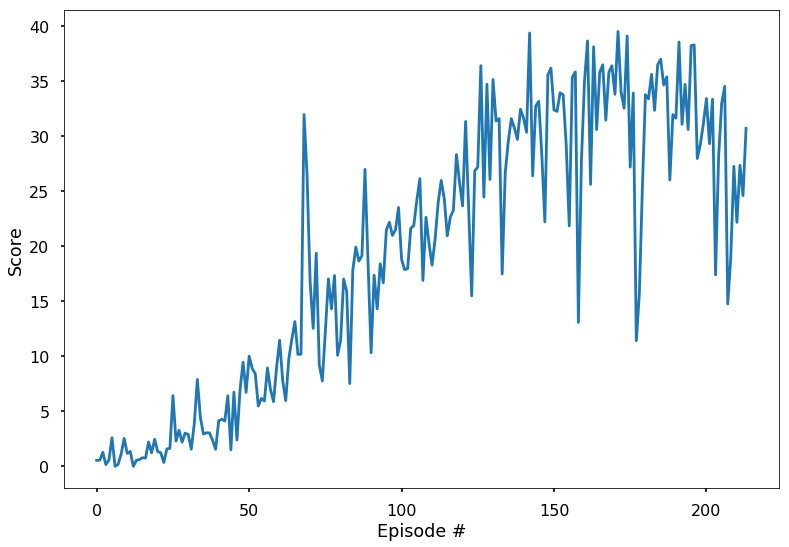

In [9]:
# scores = np.random.normal(0, 0.1, 1000)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-poster')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)    
plt.ylabel('Score')
plt.xlabel('Episode #')   
plt.show()

In [12]:
env.close()

### Multi-Agent Environment:
Below we train the multi-agent environment of the Agent along with the Reacher Environment Version 2 with 20 Agents interacting with the environment simultaneously. My Actor-Critic Implementation has been provisioned to be re-used with one or multi-agent environments.

**Please Refresh the Workspace before Executing the Code below.**

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]

num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


#### Enabling the Multi-Agent Version of the Implementation:
In the below, I have enabled the flag **parallal=True** and **num_agent** to specify the number of agents working in an environment. In my implementation I have taken consideration of both single and multiple agents in the environment. 

In [4]:
from agent import Agent
agent = Agent(state_size, action_size, random_seed=42, parallal=True, num_agents=num_agents)
#making sure working with multi-agent version.
print(f"Working with Multiple Agents: {agent.parallal}")

Working with Multiple Agents: True


In [5]:
import torch
from collections import deque
def multi_agents_ddpg(n_episodes=1000, max_t=1000, print_every=100):
    scores = []
    scores_deque = deque(maxlen=100)
    
    for ii in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        agent.reset()
        state = env_info.vector_observations
        score = np.zeros(num_agents)
        
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            agent.step(state, action, reward, next_state, done)
            
            score += reward
            state = next_state
            if np.any(done):
                break
        
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
            
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(ii, np.mean(scores_deque)), end="")
        
        if ii % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(ii, np.mean(scores_deque)))

        if np.mean(scores_deque)>=30.0:
#             print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(ii-100, np.mean(scores_deque)))
            torch.save(agent.actor_online.state_dict(), 'weights_actor.pth')
            torch.save(agent.critic_online.state_dict(), 'weights_critic.pth') 
    return scores

In [38]:
scores = multi_agents_ddpg(n_episodes=500)

Episode 100	Average Score: 28.41
Episode 105	Average Score: 30.28
Environment solved in 5 episodes!	Average Score: 30.28
Episode 106	Average Score: 30.66
Environment solved in 6 episodes!	Average Score: 30.66
Episode 107	Average Score: 31.02
Environment solved in 7 episodes!	Average Score: 31.02
Episode 108	Average Score: 31.37
Environment solved in 8 episodes!	Average Score: 31.37
Episode 109	Average Score: 31.73
Environment solved in 9 episodes!	Average Score: 31.73
Episode 110	Average Score: 32.08
Environment solved in 10 episodes!	Average Score: 32.08
Episode 111	Average Score: 32.42
Environment solved in 11 episodes!	Average Score: 32.42
Episode 112	Average Score: 32.76
Environment solved in 12 episodes!	Average Score: 32.76
Episode 113	Average Score: 33.08
Environment solved in 13 episodes!	Average Score: 33.08
Episode 114	Average Score: 33.42
Environment solved in 14 episodes!	Average Score: 33.42
Episode 115	Average Score: 33.76
Environment solved in 15 episodes!	Average Score:

KeyboardInterrupt: 

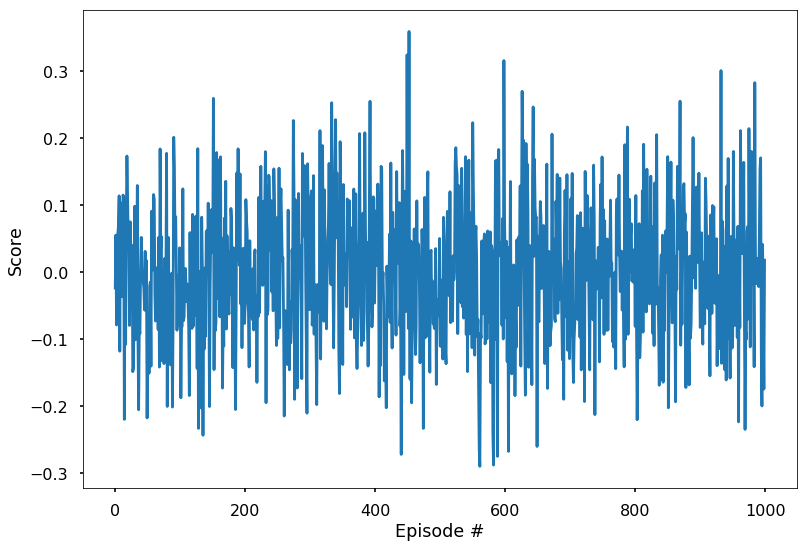

In [16]:
# scores = np.random.normal(0, 0.1, 1000)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-poster')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)    
plt.ylabel('Score')
plt.xlabel('Episode #')   
plt.show()

In [ ]:
env.close()